# Example 1: Bootstrap CI for the MEAN of an exponential distribution

In [452]:
import numpy as np

def bootstrap_ci(data, stat_func, n_boot=2000, alpha=0.05):
    """
    Compute a non-parametric bootstrap CI for a statistic.
    data      : 1D array of observations
    stat_func : function to compute the statistic (e.g., np.mean)
    n_boot    : number of bootstrap replicates
    alpha     : significance level for (1-alpha) CI
    """
    boots = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)  # resample with replacement
        boots.append(stat_func(sample))
    lower = np.percentile(boots, 100 * alpha/2)
    upper = np.percentile(boots, 100 * (1 - alpha/2))
    return lower, upper, boots

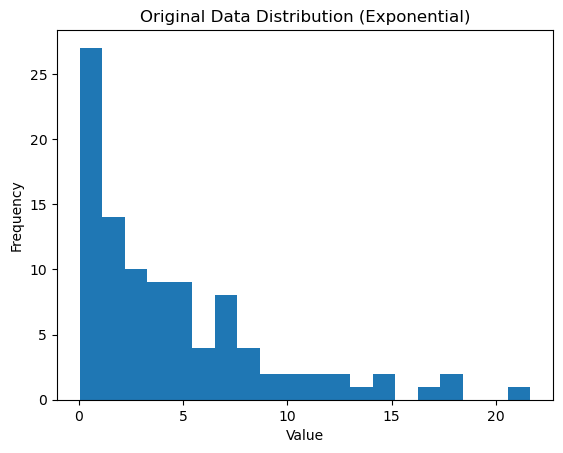

In [453]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# 1. Simulate a skewed dataset (Exponential)
# -----------------------------------------------
np.random.seed(42)  
data = np.random.exponential(scale=5, size=100)

# Plot original data distribution
plt.figure()
plt.hist(data, bins=20)
plt.title("Original Data Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()




In [454]:
np.mean(data)

np.float64(4.5737401951943575)

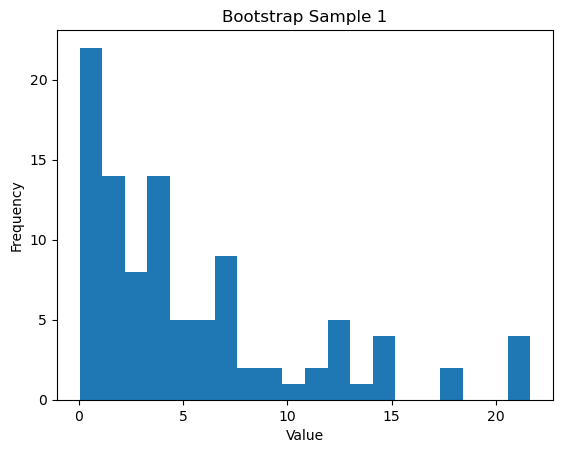

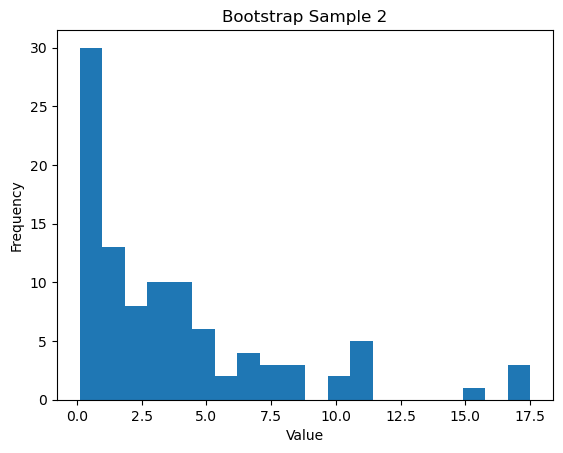

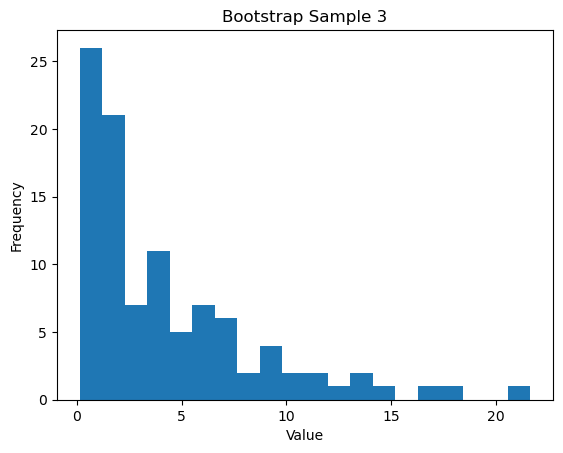

In [455]:
# ---------------------------------------------------
# 2. Generate and plot several bootstrap samples
# ---------------------------------------------------
n_boot_samples = 3
sample_size = len(data)

for i in range(1, n_boot_samples + 1):
    # Resample with replacement
    sample = np.random.choice(data, size=sample_size, replace=True)
    plt.figure()
    plt.hist(sample, bins=20)
    plt.title(f"Bootstrap Sample {i}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


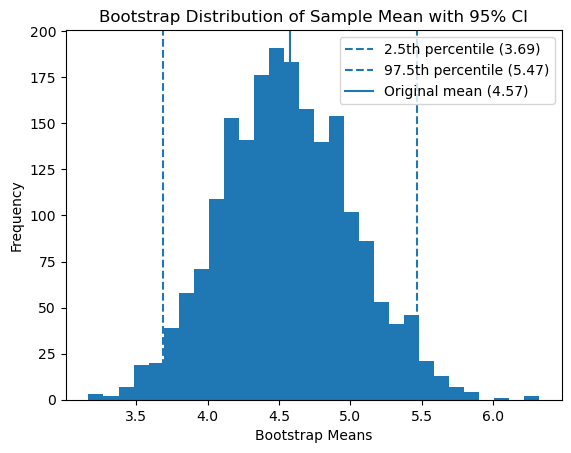

In [456]:

# ---------------------------------------------------
# 3. Build full bootstrap distribution of the mean
# ---------------------------------------------------
n_replicates = 2000
boots = []
for _ in range(n_replicates):
    # Resample and compute the statistic (mean)
    sample = np.random.choice(data, size=sample_size, replace=True)
    boots.append(np.mean(sample))

# Compute 95% CI bounds
lower = np.percentile(boots, 2.5)
upper = np.percentile(boots, 97.5)
obs_mean = np.mean(data)

# Plot the bootstrap distribution of means with CI
plt.figure()
plt.hist(boots, bins=30)
plt.axvline(lower, linestyle='--', label=f"2.5th percentile ({lower:.2f})")
plt.axvline(upper, linestyle='--', label=f"97.5th percentile ({upper:.2f})")
plt.axvline(obs_mean, linestyle='-', label=f"Original mean ({obs_mean:.2f})")
plt.title("Bootstrap Distribution of Sample Mean with 95% CI")
plt.xlabel("Bootstrap Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Example 2: Bootstrap CI for the MEDIAN of a skewed (Exponential) distribution

In [457]:
np.random.seed(1)
# Simulate 100 observations from an Exponential distribution (scale=5)
data2 = np.random.exponential(scale=5, size=100)

median2 = np.median(data2)
ci2 = bootstrap_ci(data2, np.median)
print(f"Example 2 - Sample median: {median2:.2f}")
print(f"Example 2 - 95% bootstrap CI for median: ({ci2[0]:.2f}, {ci2[1]:.2f})\n")

Example 2 - Sample median: 3.19
Example 2 - 95% bootstrap CI for median: (2.65, 4.42)



# Example 3: Bootstrap CI for a PROPORTION (Bernoulli data)

In [458]:

np.random.seed(2)
# Simulate 100 binary outcomes with p=0.3
data3 = np.random.binomial(n=1, p=0.3, size=100)

prop3 = np.mean(data3)
ci3 = bootstrap_ci(data3, np.mean)
print(f"Example 3 - Sample proportion: {prop3:.2f}")
print(f"Example 3 - 95% bootstrap CI for proportion: ({ci3[0]:.2f}, {ci3[1]:.2f})\n")

Example 3 - Sample proportion: 0.21
Example 3 - 95% bootstrap CI for proportion: (0.14, 0.29)



# Example 4: Bootstrap CI for the DIFFERENCE IN MEANS between two independent groups


In [459]:
np.random.seed(3)
# Group A: n=50, mean=5, sd=2; Group B: n=60, mean=7, sd=2.5
groupA = np.random.normal(loc=5, scale=2, size=50)
groupB = np.random.normal(loc=7, scale=2.5, size=60)

obs_diff = np.mean(groupA) - np.mean(groupB)

# Perform bootstrap: resample each group separately each replicate
boots_diff = []
for _ in range(2000):
    sampA = np.random.choice(groupA, size=len(groupA), replace=True)
    sampB = np.random.choice(groupB, size=len(groupB), replace=True)
    boots_diff.append(np.mean(sampA) - np.mean(sampB))

ci4_lower = np.percentile(boots_diff, 2.5)
ci4_upper = np.percentile(boots_diff, 97.5)
print(f"Example 4 - Observed mean difference (A - B): {obs_diff:.2f}")
print(f"Example 4 - 95% bootstrap CI for difference: ({ci4_lower:.2f}, {ci4_upper:.2f})\n")

Example 4 - Observed mean difference (A - B): -2.80
Example 4 - 95% bootstrap CI for difference: (-3.63, -1.97)



## On your own:

Below are five simulated data sets. In each one, you are asked to bootstrap a particular metric. Please generate 95% confidence intervals (two sided distribution) for each metric and interpret what the confidence interval tells you. 

In [460]:
import numpy as np

# Set a common sample size
n = 100


In [461]:
import statistics

# 1. 100 draws from a Normal(μ=50, σ=10) distribution.
#    → Bootstrap the **sample mean**.
np.random.seed(0)
data1 = np.random.normal(loc=50, scale=10, size=n)

lower, upper, boots = bootstrap_ci(data=data1, stat_func=np.mean, n_boot=n, alpha=0.5)
print(f"95% bootstrap CI for means: ({lower:.2f}, {upper:.2f})")

95% bootstrap CI for means: (50.22, 51.47)


In [462]:
# 2. 100 draws from an Exponential(scale=5) (skewed) distribution.
#    → Bootstrap the **sample median**.
np.random.seed(1)
data2 = np.random.exponential(scale=5, size=n)

lower, upper, boots = bootstrap_ci(data=data2, stat_func=np.median, n_boot=n, alpha=0.5)
print(f"95% bootstrap CI for medians: ({lower:.2f}, {upper:.2f})")

95% bootstrap CI for medians: (2.72, 3.84)


In [463]:
# 3. 100 draws from a Uniform(0, 100) distribution.
#    → Bootstrap the **90th percentile**.
np.random.seed(2)
data3 = np.random.uniform(low=0, high=100, size=n)

lower, upper, boots = bootstrap_ci(data=data3, stat_func=lambda x: np.quantile(x, 0.9), n_boot=n, alpha=0.5)
print(f"95% bootstrap CI for Quantiles: ({lower:.2f}, {upper:.2f})")

95% bootstrap CI for Quantiles: (79.96, 85.40)


In [464]:
# 4. 100 Bernoulli trials with p=0.3 (0/1 data).
#    → Bootstrap the **sample proportion** (mean of the 0/1’s).
np.random.seed(3)
data4 = np.random.binomial(n=1, p=0.3, size=n)

lower, upper, boots = bootstrap_ci(data=data4, stat_func=np.mean, n_boot=n, alpha=0.5)
print(f"95% bootstrap CI for sample proportion: ({lower:.2f}, {upper:.2f})")

95% bootstrap CI for sample proportion: (0.17, 0.24)


In [465]:
# 5. 100 draws from a heavy-tailed Student’s t (df=3).
#    → Bootstrap the **sample standard deviation**.
np.random.seed(4)
data5 = np.random.standard_t(df=3, size=n)

lower, upper, boots = bootstrap_ci(data=data5, stat_func=np.std, n_boot=n, alpha=0.5)
print(f"95% bootstrap CI for sample standard deviation: ({lower:.2f}, {upper:.2f})")

95% bootstrap CI for sample standard deviation: (1.39, 1.61)


<details>
<summary><strong>Instructor Solution</strong></summary>

```python
import numpy as np

# Bootstrap function
def bootstrap_ci(data, stat_func, n_boot=2000, alpha=0.05):
    boots = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        boots.append(stat_func(sample))
    lower = np.percentile(boots, 100 * alpha/2)
    upper = np.percentile(boots, 100 * (1 - alpha/2))
    return np.mean(data) if stat_func == np.mean else stat_func(data), lower, upper

# Simulations
n = 100
np.random.seed(0)
data1 = np.random.normal(loc=50, scale=10, size=n)
np.random.seed(1)
data2 = np.random.exponential(scale=5, size=n)
np.random.seed(2)
data3 = np.random.uniform(low=0, high=100, size=n)
np.random.seed(3)
data4 = np.random.binomial(n=1, p=0.3, size=n)
np.random.seed(4)
data5 = np.random.standard_t(df=3, size=n)

# Define statistics
stats = [
    ("normal", np.mean),
    ("exponential", np.median),
    ("uniform", lambda x: np.percentile(x, 90)),
    ("binomial", np.mean),
    ("t_df3", np.std),
]

datasets = {
    "normal": data1,
    "exponential": data2,
    "uniform": data3,
    "binomial": data4,
    "t_df3": data5,
}

# Compute bootstrap CIs
results = []
for name, func in stats:
    data = datasets[name]
    obs = func(data)
    _, lower, upper = bootstrap_ci(data, func)
    results.append({
        "dataset": name,
        "statistic": func.__name__ if hasattr(func, '__name__') else "percentile_90",
        "observed": obs,
        "ci_lower": lower,
        "ci_upper": upper
    })

results


## Finally: find a new data set out in the real world, load it in, generate a histrogram, calculate the sample mean, and generate a 95% (two sided) boostrap confidence interval. Once you finish you can continue the MLE lab from July 17th or move on to your project work once you've finished. 

In [466]:
import pandas as pd
import re

df = pd.read_csv('huge_census_data_2020.csv')

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

df['ZIP Code'] = df.iloc[:, 1].str.extract(r'(\d{5})').astype(int)

df_less = df[df['ZIP Code'] >= 50000]

df_less.head()

/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_21161/3031042052.py:4: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('huge_census_data_2020.csv')


,Geography,Geographic Area Name,Count!!SEX AND AGE!!Total population,Count!!SEX AND AGE!!Total population!!Under 5 years,Count!!SEX AND AGE!!Total population!!5 to 9 years,Count!!SEX AND AGE!!Total population!!10 to 14 years,Count!!SEX AND AGE!!Total population!!15 to 19 years,Count!!SEX AND AGE!!Total population!!20 to 24 years,Count!!SEX AND AGE!!Total population!!25 to 29 years,Count!!SEX AND AGE!!Total population!!30 to 34 years,...,"Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!Sold, not occupied","Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!For seasonal, recreational, or occasional use",Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units!!All other vacants,Percent!!VACANCY RATES!!Homeowner vacancy rate (percent) [4],Percent!!VACANCY RATES!!Rental vacancy rate (percent) [5],Percent!!HOUSING TENURE!!Occupied housing units,Percent!!HOUSING TENURE!!Occupied housing units!!Owner-occupied housing units,Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied housing units,NaN,ZIP Code
17050,860Z200US50001,ZCTA5 50001,695,39,55,44,39,35,17,29,...,0.0,0.0,3.4,(X),(X),100.0,89.3,10.7,NaN,50001
17051,860Z200US50002,ZCTA5 50002,1274,73,77,81,77,49,62,109,...,0.0,2.1,5.5,(X),(X),100.0,76.3,23.7,NaN,50002
17052,860Z200US50003,ZCTA5 50003,9428,697,783,811,593,319,451,590,...,0.5,0.7,1.0,(X),(X),100.0,81.4,18.6,NaN,50003
17053,860Z200US50005,ZCTA5 50005,679,36,43,27,42,47,25,42,...,0.0,0.3,2.0,(X),(X),100.0,87.0,13.0,NaN,50005
17054,860Z200US50006,ZCTA5 50006,1502,89,102,91,97,61,65,87,...,1.1,1.6,5.0,(X),(X),100.0,76.0,24.0,NaN,50006


95% bootstrap CI for sample standard deviation: (643.97, 655.85)
Sample mean: 649.88


/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_21161/2417437171.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


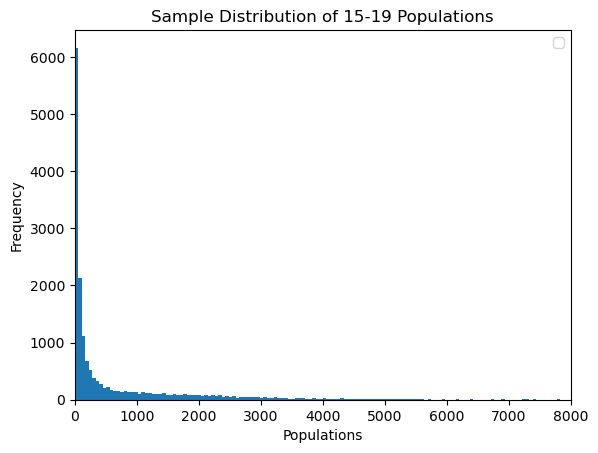

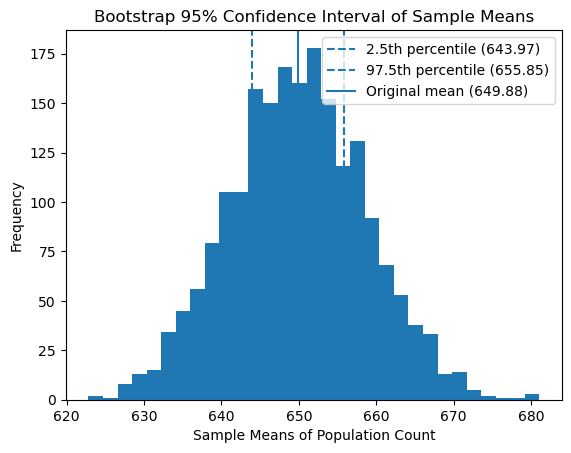

In [467]:
data_set = df_less['Count!!SEX AND AGE!!Total population!!15 to 19 years'].to_numpy()

lower, upper, boots = bootstrap_ci(data=data_set, stat_func=np.mean, n_boot=2000, alpha=0.5)
print(f"95% bootstrap CI for sample standard deviation: ({lower:.2f}, {upper:.2f})")


sample_mean = np.mean(data_set)

print(f'Sample mean: {sample_mean:.2f}')

plt.figure()
plt.hist(data_set, bins='auto')
plt.title("Sample Distribution of 15-19 Populations")
plt.xlabel("Populations")
plt.ylabel("Frequency")
plt.xlim(0, 8000)
plt.legend()
plt.show()

plt.figure()
plt.hist(boots, bins='auto')
plt.axvline(lower, linestyle='--', label=f"2.5th percentile ({lower:.2f})")
plt.axvline(upper, linestyle='--', label=f"97.5th percentile ({upper:.2f})")
plt.axvline(sample_mean, linestyle='-', label=f"Original mean ({sample_mean:.2f})")
plt.title("Bootstrap 95% Confidence Interval of Sample Means")
plt.xlabel("Sample Means of Population Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()